# Data Visualization: Ford Go Bike

This data set includes information about individual rides made in a bike-sharing system for covering the greater San Francisco Bay area.

### Table of Contents

- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

In [3]:
# importing all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In this slide presentation. Many insights will be visualized on (Ford GoBike and baywheels bike for 2019. The visualization will be in three sections. Univariate, exploring one variable and its distribution. Bivariate, exploring two Variables  and the correlation between them and multivariate exploring the relationship between three variables.

# DataFrame:

In [4]:
df=pd.read_csv("../201902-fordgobike-tripdata.csv",sep=',')
df.head()#reading first 5 rows

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# DataType and Null count:

In [5]:
df.info(verbose=True,null_counts=True)#Viewing Dtype and check for NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<ipython-input-5-988734abc43d>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True,null_counts=True)#Viewing Dtype and check for NaN


In [6]:
#changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


>There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

# Now we have stored our data into a DataFrame lets start visualization.

# Univariate visualization.

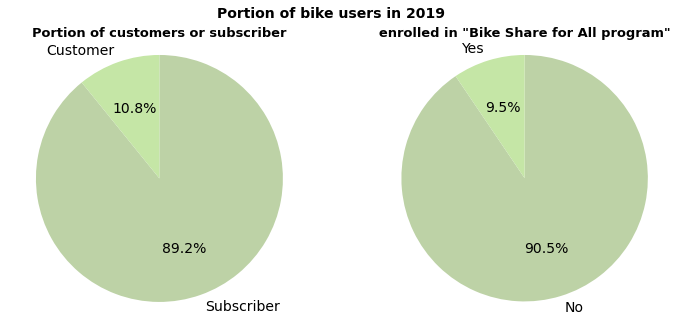

In [8]:
#create figure and axes object and setting number of columns of subplit grid
fig,(ax1,ax2)=plt.subplots(figsize=(12,5),ncols=2)
colors=["#BDD2A6","#C5E6A6"]
fig.suptitle('Portion of bike users in 2019', fontsize=14, fontweight='bold')
user_type=df.user_type.value_counts()
bike_sh=df.bike_share_for_all_trip.value_counts()
# first axes plotting Portion of user_type
_=ax1.pie(user_type,labels=user_type.index,startangle=90,counterclock=False,
       wedgeprops={'width':1},autopct='%1.1f%%',textprops={'fontsize': 14},
         colors=colors)
_=ax1.set_title("Portion of customers or subscriber",size=13,fontweight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
_=ax1.axis('equal')

# Second  axes plotting Portion of bike_sh
_=ax2.pie(bike_sh,labels=bike_sh.index,startangle=90,counterclock=False,
         wedgeprops={'width':1},autopct='%1.1f%%',textprops={'fontsize': 14},
          colors=colors)
_=ax2.set_title("enrolled in \"Bike Share for All program\""
               ,size=13,fontweight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
_=ax2.axis('equal')

## Observation: 
### Right pie chart:
This pie chart shows the portion of users enrolled in "Bike Share for All Program" and the majority in the dataset are not. Bike Share for All is available to Bay Area residents ages 18 and older who qualify for Calfresh, SFMTA Lifeline Pass, or PG&E CARE utility discount.

### Left pie chart:
This pie chart shows the portion of bike users wether They're a cCustomers or subscribers, the pie chart indicates that the majority are subscribed. The reason for that Probably because the fact that single rides start at \\$2 for the first 30 minutes, then \\$2 per additional 15 minutes for the casual users whereas an annual membership has unlimited 45-minute Classic bike rides and discounted ebikes: Free unlocks and $0.15 per minute (waived if no Classic bikes available)


**Resource:** https://www.lyft.com/bikes/bay-wheels/bike-share-for-all

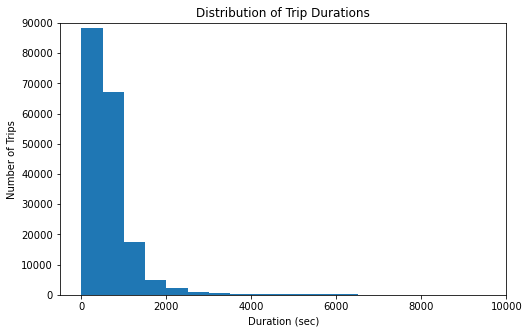

In [9]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()


## Observation:
There is a long tail in the distribution so lets put it on log scale.

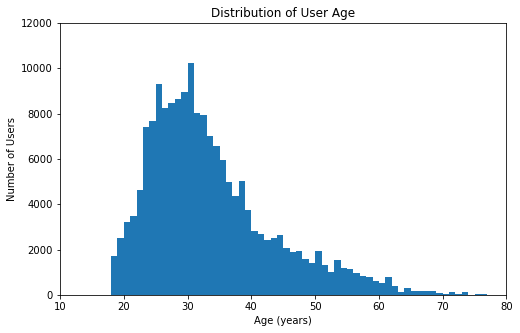

In [10]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

## Observation:
We can see that the distribution is more concentrated between 20 to 40 years old.

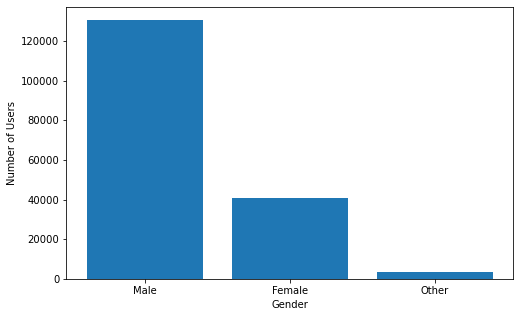

In [11]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

## Observation:
number of males is higher than female and other

# Bivariate visualization.
## Exploring  distribution of the dataset and variables using heatmap.
we will explore selected variable and try to see the correlation between each one using visualization.

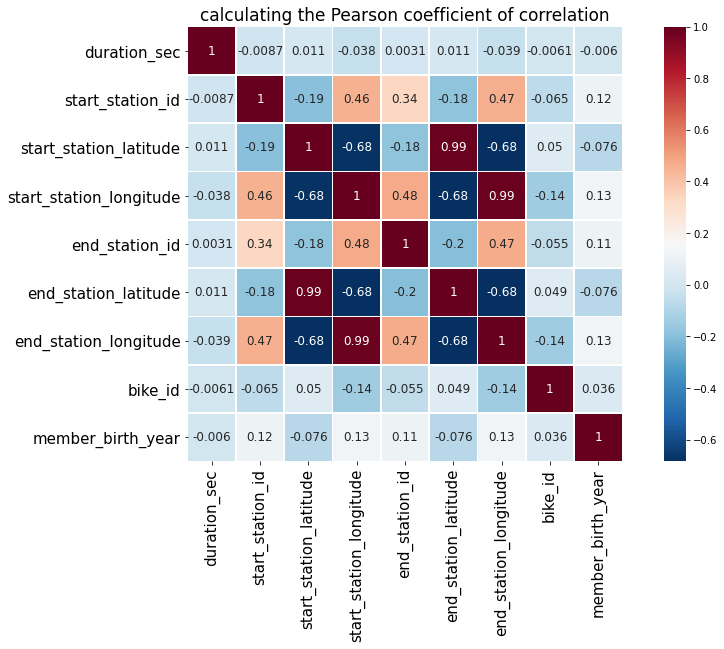

In [12]:
pearsoncorr=df.copy()
pearsoncorr=pearsoncorr.corr(method='pearson')#new data frame that holds the pearson correlation
plt.figure(figsize=(15,8))#create a figure object
_=sns.heatmap(pearsoncorr,cmap='RdBu_r',
           annot=True,annot_kws={'size':12},
           linewidth=0.5,square=True)#visualization

plt.xticks(size=15);plt.yticks(size=15)#setting x & y tick size
_=plt.title("calculating the Pearson coefficient of correlation",size=17)# creating title

# Observation:
There is a high correlation between start station latitude and end station longitude.

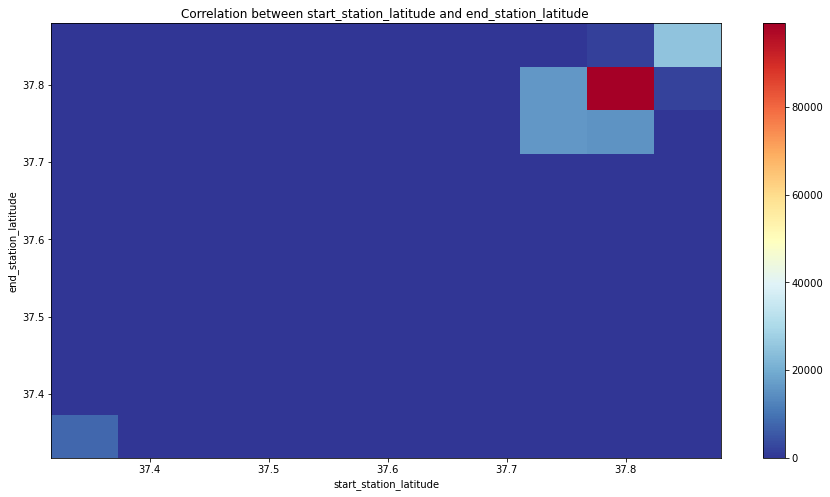

In [13]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=[15,8])#create figure and axis for the plot
# create 2d hist for start station latitude in the x axis and end station latitude in the y axis
h=ax.hist2d(x=df.start_station_latitude,y=df.end_station_latitude,cmap=plt.cm.RdYlBu_r)
plt.colorbar(mappable=h[3],ax=ax)
plt.title("Correlation between start_station_latitude and end_station_latitude ")
plt.ylabel("end_station_latitude")
plt.xlabel("start_station_latitude")
plt.show()
# h[3]-> get the image from the return value so it knows what colormap and limits for colorbar

# Observation:
There is a positive correlation between the start and end latitude as we can see from the visualization.

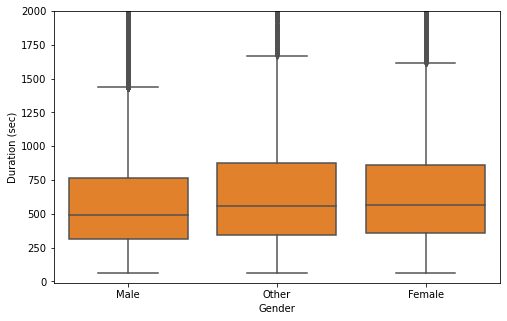

In [14]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

# Observation:

Though quantity of male riders are very high then other and female but we can see that higher percentage of female and other rides longer trips then males.

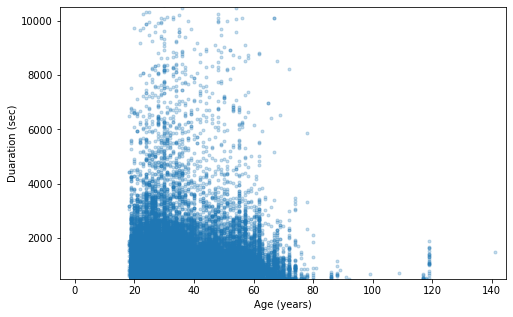

In [15]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()


# Observation:
As most of the durations are below 6000 and age is below 80

# Multivariate visualization.

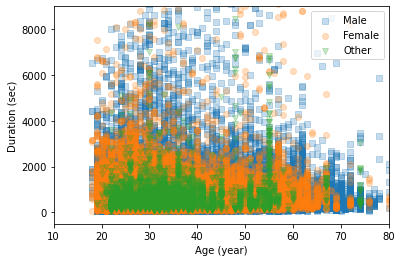

In [16]:
gender_markers = [['Male', 's'],['Female', 'o'],['Other', 'v']]

for gender, marker in gender_markers:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()


# Observation:
The two categorical measures gender and user type play into the relationship between trip duration and age.

>This plot does not show quit a clear picture, lets seperate all three genders into different graphs.

This plot does not show quit a clear picture, lets seperate all three genders into different graphs.

/Users/fatma/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


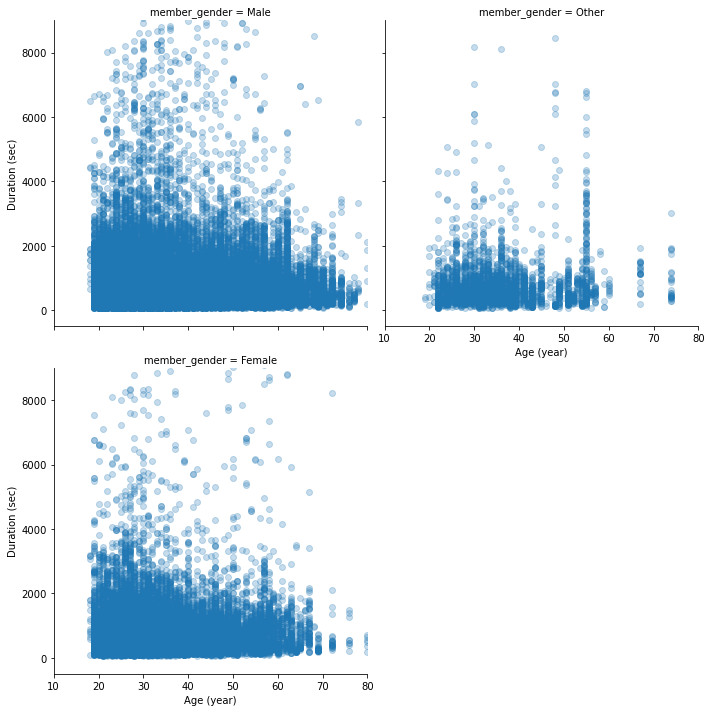

In [17]:
df['age'] = (2019 - df['member_birth_year'])
genders = sns.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)')

plt.show()

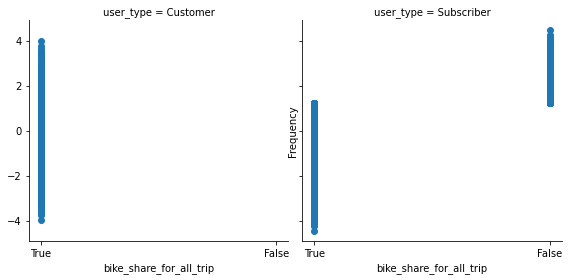

In [18]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(df, col="user_type", height=4)
g.map(quantile_plot, "bike_share_for_all_trip");
plt.xticks([0,1],["True","False"])
plt.ylabel('Frequency')
plt.show()

# Observation:

There is not a single user who's a customer and inrolled in bike for all program at least in 2019. 

In [ ]:
!jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook explanatory_analysis.ipynb to slides
[NbConvertApp] Writing 905869 bytes to explanatory_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/explanatory_analysis.slides.html
Use Control-C to stop this server
